In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make CSV file of Salary data

In [ ]:
data = {'YearsExperience':[1.1,1.3,1.5,2. ,2.2,2.9,3. ,3.2,3.2,3.7,3.9,4. ,4. ,4.1,4.5,4.9,5.1,5.3,5.9,6. ,6.8,7.1,7.9,8.2,8.7,9. ,9.5,9.6,0.3,0.5], 'Salary': [ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.]}

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.to_csv('Salary_Data.csv', sep=',', index=False, encoding='utf-8')

In [5]:
Data_Frame= pd.read_csv("Salary_Data.csv")

In [6]:
Data_Frame

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
X= Data_Frame.iloc[:,:-1].values
y= Data_Frame.iloc[:,-1].values

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# X_train.shape
# all data when train test split in X_train dataset
for i in range(0,24):
  print(X_train[i],y_train[i])

In [ ]:
# store the slary data and YearsExperience data
to_show_train=X_train
to_show_test=X_test

In [ ]:
# afte train test split test data without scaling for use to plot
to_show_test

In [ ]:
# afte train test split train data without scaling for use to plot
to_show_train

In [ ]:
#side by side data of test data afte train test split
for i in range(0,6):
  print(X_test[i],y_test[i])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [12]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [13]:
X_train

array([[ 1.75832984],
       [-0.40973925],
       [ 0.09356251],
       [ 1.10016601],
       [-0.83560996],
       [ 0.01613147],
       [-0.7194634 ],
       [-0.21616165],
       [ 1.21631257],
       [ 0.6742953 ],
       [-1.45505827],
       [ 2.10676952],
       [-0.79689444],
       [-1.1066186 ],
       [ 0.32585562],
       [ 0.36457114],
       [-0.52588581],
       [-0.7194634 ],
       [ 1.52603672],
       [-1.18404964],
       [-1.53248931],
       [ 0.79044186],
       [-0.06129957],
       [-0.40973925]])

In [14]:
X_test

array([[-1.37762723],
       [ 2.02933848],
       [-0.37102373],
       [-0.44845477],
       [ 1.71961432],
       [ 1.40989017]])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [19]:
np.mean(mse)

-39394144.56440445

In [27]:
pred= regression.predict(X_test)

In [28]:
pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

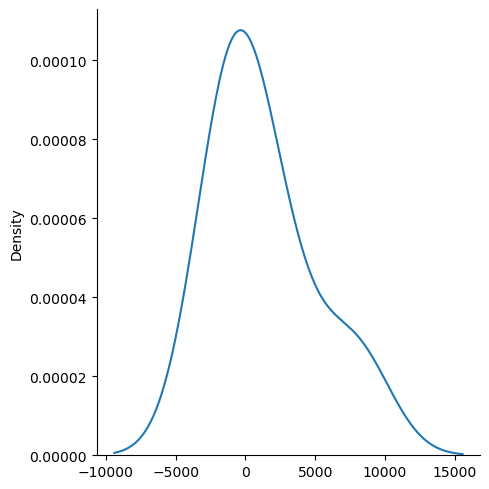

In [29]:
import seaborn as sns
sns.displot(pred-y_test,kind='kde')

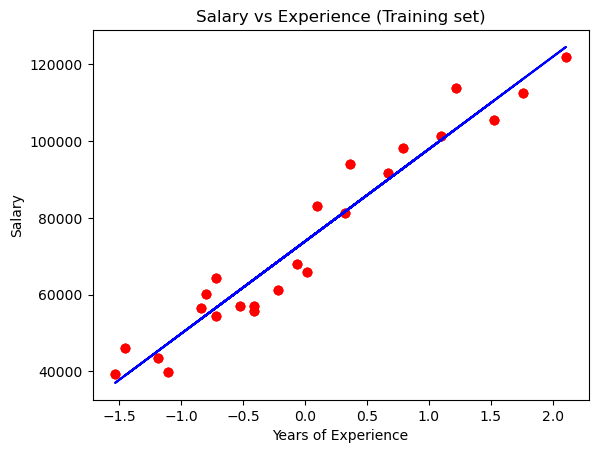

In [32]:
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regression.predict(X_train), color= 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

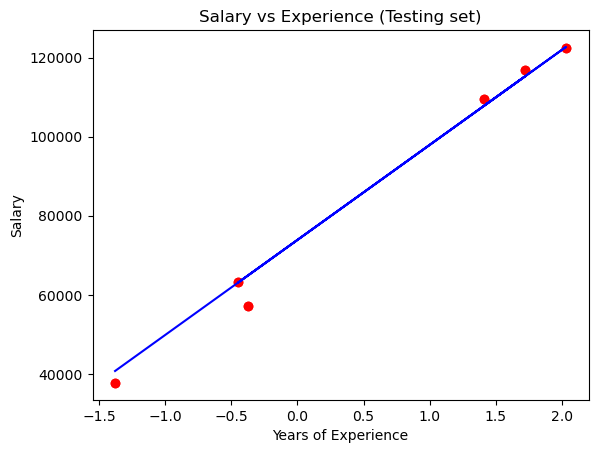

In [34]:
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_test, regression.predict(X_test), color= 'blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()